In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv("incidents-100k.csv")
import pandas as pd
from matplotlib import pyplot as plt
df.date = pd.to_datetime(df.date , format = "%Y-%m-%d")
df.index = pd.DatetimeIndex(df.date)

## 1. Trend in number of crimes over the years

Text(0,0.5,'Number of crimes')

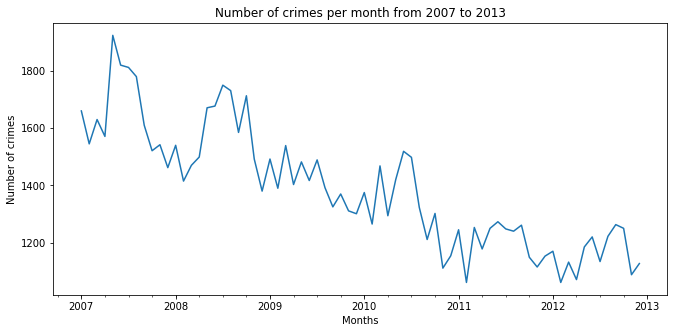

In [12]:
plt.figure(figsize = (11,5))
df.resample('M').size().plot(legend = False)
plt.title('Number of crimes per month from 2007 to 2013')
plt.xlabel('Months')
plt.ylabel('Number of crimes')

## Generally, we see a clear drop from January to February, followed by an incline leading into March. As the year progresses closer to the months of summer, the amount of crime tends to peak. Following the rise, crime begins to drop as we approach the winter months. For all years, their crime trends share a similar shape, suggesting that crime may be cyclic and can be analyzed further.

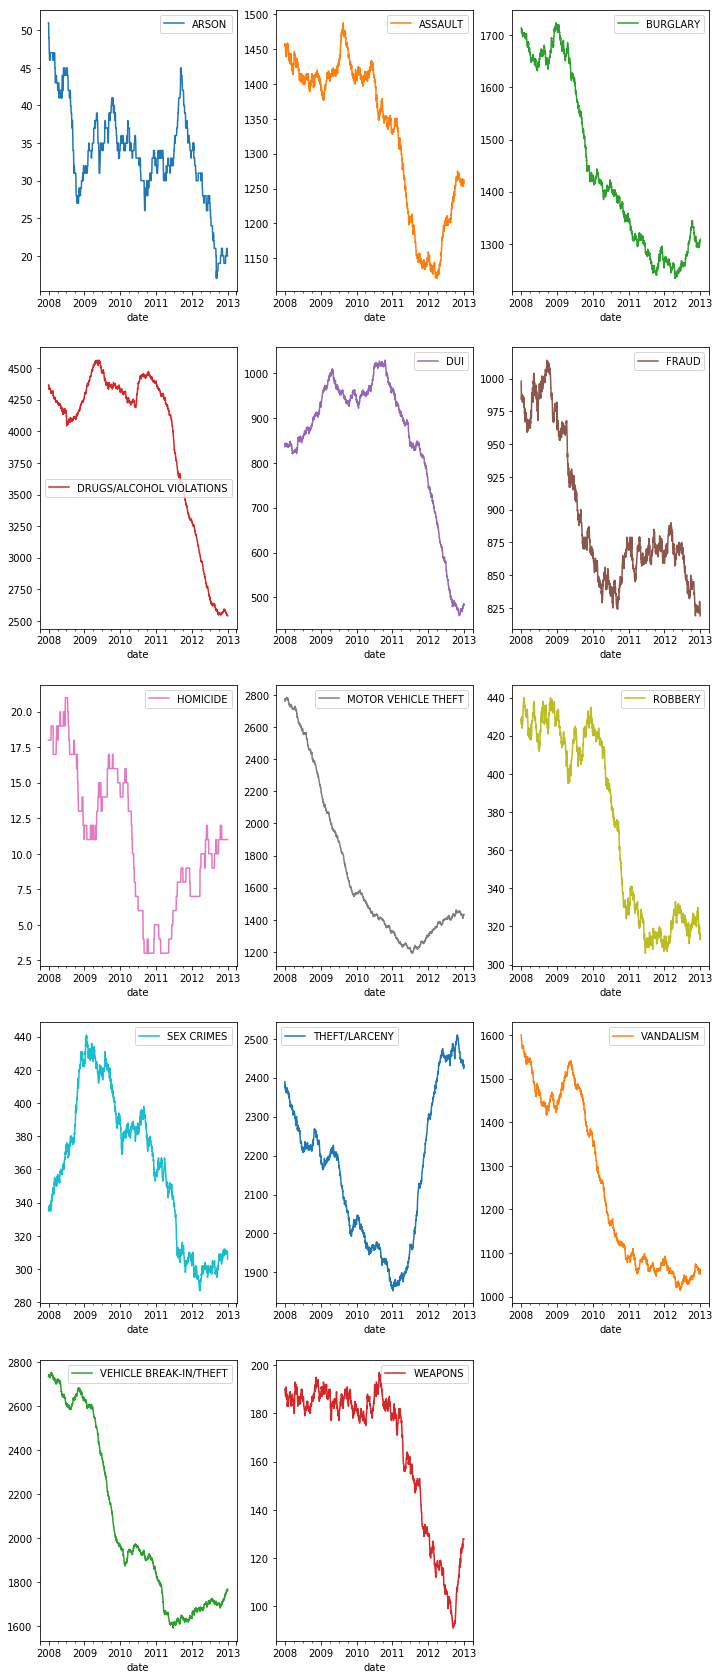

In [18]:
crimes_count_date = df.pivot_table('year', aggfunc=np.size , columns = 'type' , index = df.index , fill_value = 0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plot = crimes_count_date.rolling(365).sum().plot(figsize=(12,30) , subplots = True , layout = (-1,3) ,sharex = False , sharey = False)

# 2. Crimes by time of day

Text(0.5,1,'Total crimes by Time period')

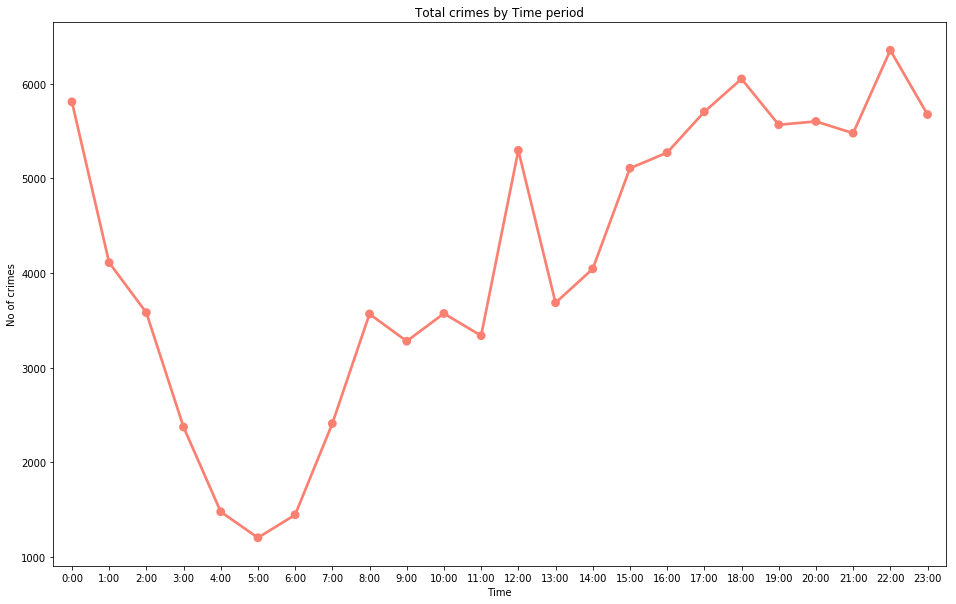

In [23]:
crimes_by_time = df.groupby('hour').size().reset_index(name = 'No of crimes')
crimes_by_time['hour'] = crimes_by_time['hour'].apply(lambda x : str(x) + ':00')
fig = plt.figure(figsize = (16,10))
sns.pointplot(data=crimes_by_time , x = 'hour' , y = 'No of crimes' , color = 'salmon')
plt.xlabel('Time')
plt.ylabel('No of crimes')
plt.title('Total crimes by Time period')

## As we can see, crime happens mostly during daytime and dips in the early morning. it tells citizens and policemen when to be more careful :  throughout the day.

## 3. Number of crimes v/s neighbourhood for various crimes

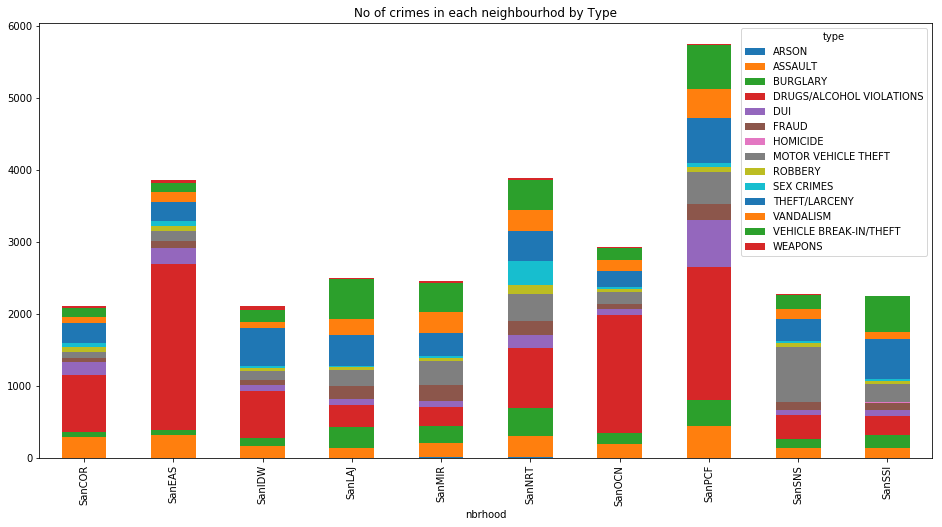

In [96]:
#  Getting top 10 neighbourhoods that have maximum frequency of crime. 
l = df['nbrhood'].value_counts()[:10].index.tolist()


df1 = df[df['nbrhood'].isin(l)]
crimes_by_type = df1.groupby(['nbrhood' ,'type']).size().reset_index(name = 'No of crimes')
crimes_by_type_pivot = pd.pivot_table(crimes_by_type , index = ['nbrhood'] , columns = ['type'] , values = 'No of crimes' , aggfunc = np.sum)
crimes_by_type_pivot.plot(kind = 'bar' , stacked = True , figsize = (16,8) , title = 'No of crimes in each neighbourhod by Type')

##  To Understand what type of crimes are prelevant in which neighbourhood , we have plotted a stacked bar chart of 'number of crimes' v/s 'neighbourhood'. For each neighbourhood, we can get a clear picture of distribution crimes in that neighbourhood.